<a href="https://colab.research.google.com/github/toliyang/AI_ML/blob/main/Deep%20Learning/S_39_1%20ANN%20(Regression)/Artificial_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


## Part 1 - Data Preprocessing

### Importing the dataset

In [2]:
# use url as the file path
fp = 'https://raw.githubusercontent.com/toliyang/AI_ML/refs/heads/main/Deep%20Learning/S_39_1%20ANN%20(Regression)/Folds5x2_pp_adj.csv'

# read as dataframe for applicable data elements
dataset = pd.read_csv(fp)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values


### Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Part 2 - Building the ANN

In [ ]:
# import tf lib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError, R2Score

In [ ]:
tf.__version__

'2.19.0'

### Initializing the ANN

In [ ]:

ann = Sequential()

### Adding the input layer and the first hidden layer

In [ ]:
ann.add(Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [ ]:
ann.add(Dense(units=6, activation='relu'))

### Adding the output layer

In [ ]:
ann.add(Dense(units=1))

## Part 3 - Training the ANN

### Compiling the ANN

In [ ]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=[MeanSquaredError(),
        MeanAbsoluteError(),
        R2Score()])

### Training the ANN model on the Training set

In [ ]:

history = ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 100.1103 - mean_absolute_error: 8.0529 - mean_squared_error: 100.1103 - r2_score: 0.6566
Epoch 2/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 86.2396 - mean_absolute_error: 7.4683 - mean_squared_error: 86.2396 - r2_score: 0.7038
Epoch 3/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 72.4181 - mean_absolute_error: 6.8633 - mean_squared_error: 72.4181 - r2_score: 0.7501
Epoch 4/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 60.0912 - mean_absolute_error: 6.2203 - mean_squared_error: 60.0912 - r2_score: 0.7948
Epoch 5/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 50.8277 - mean_absolute_error: 5.7911 - mean_squared_error: 50.8277 - r2_score: 0.8241
Epoch 6/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 44.8070 - mean_absolute_error: 5.3740 - mean_squared_error: 44.8070 - r2_score: 0.8461
Epoch 7/100
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 39.0704 - mean_absolute_error: 4.9861 - mean_squa

### Predicting the results of the Test set

In [ ]:
y_pred = ann.predict(X_test)
np.set_printoptions(precision=2)

y_pred_a = y_pred.reshape(len(y_pred),1)
y_test_a = y_test.reshape(len(y_test),1)

print(np.concatenate((y_pred_a, y_test_a),axis=1))
print(dataset.columns)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[429.11 426.18]
 [448.46 451.1 ]
 [443.98 442.87]
 ...
 [454.97 454.2 ]
 [448.01 444.13]
 [430.33 436.58]]
Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')


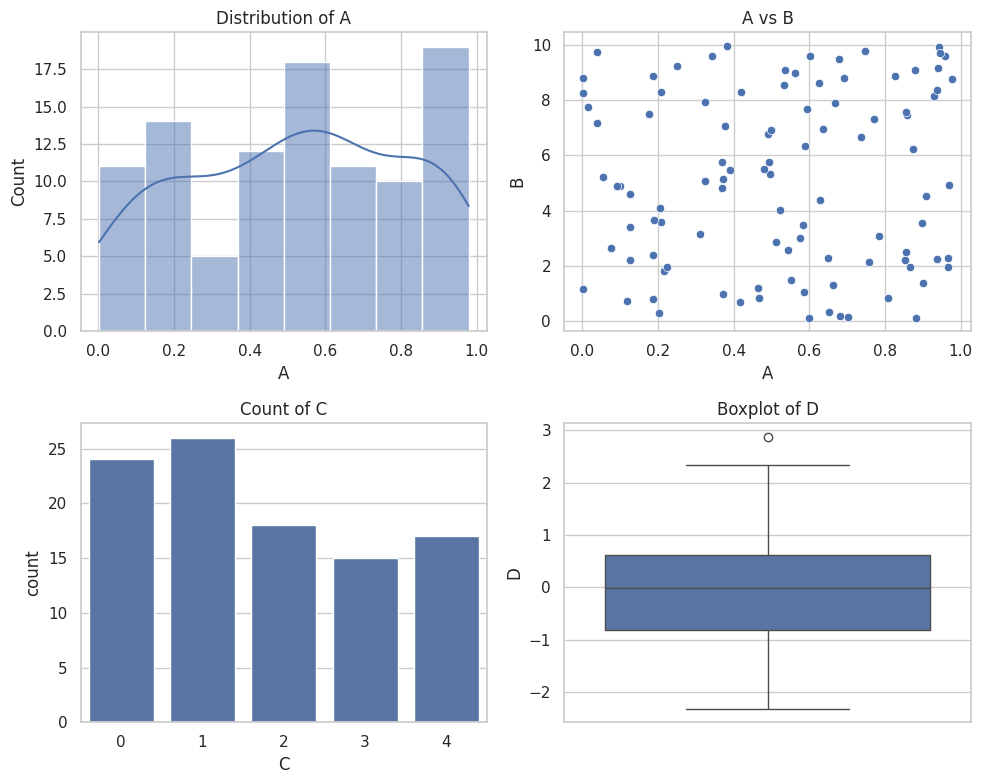

In [ ]:
# Create some sample data
data = {
    'A': np.random.rand(100),
    'B': np.random.rand(100) * 10,
    'C': np.random.randint(0, 5, 100),
    'D': np.random.normal(0, 1, 100)
}
df = pd.DataFrame(data)

# Create a figure and a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8)) # 2 rows, 2 columns

# Plotting on each subplot
# Subplot 1 (top-left)
sns.histplot(df['A'], ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of A')

# Subplot 2 (top-right)
sns.scatterplot(x=df['A'], y=df['B'], ax=axes[0, 1])
axes[0, 1].set_title('A vs B')

# Subplot 3 (bottom-left)
sns.countplot(x=df['C'], ax=axes[1, 0])
axes[1, 0].set_title('Count of C')

# Subplot 4 (bottom-right)
sns.boxplot(y=df['D'], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of D')

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plot
plt.show()

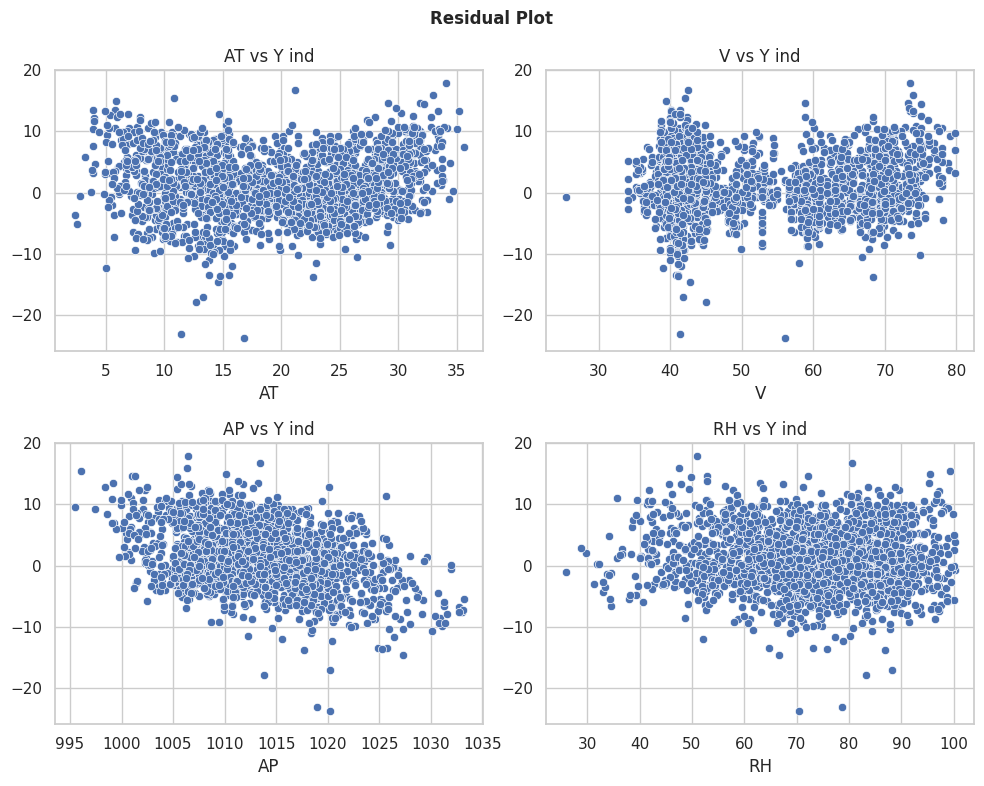

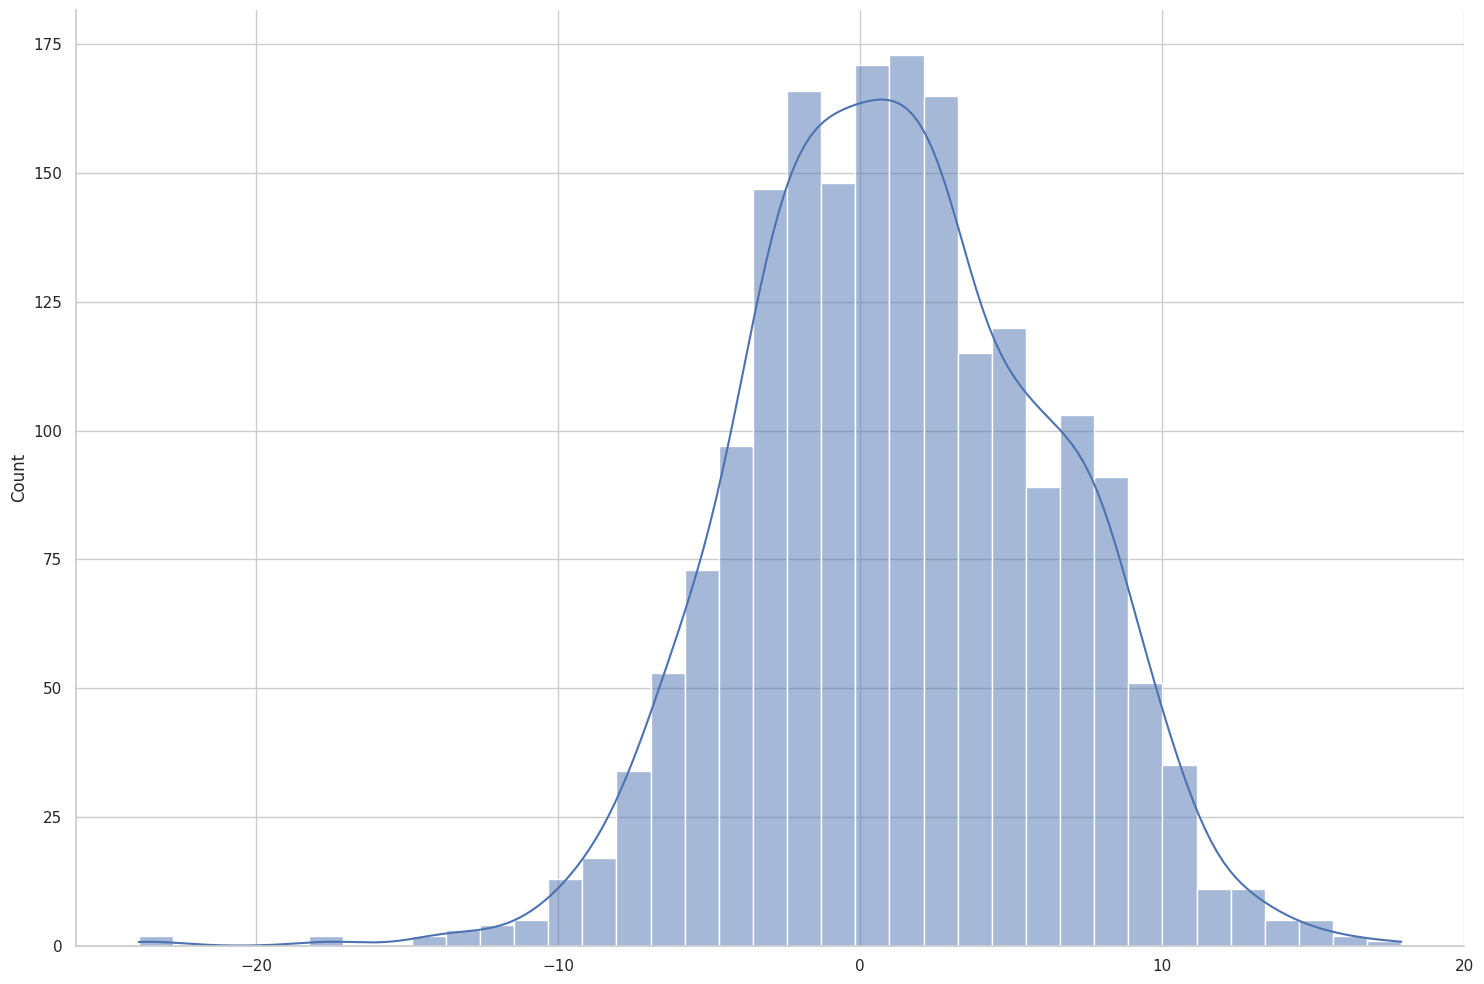

In [ ]:
# residual plot

sns.set_theme(style="whitegrid")

# Create a figure and a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8)) # 2 rows, 2 columns

# calc residual
residual = y_test_a - y_pred_a
# reshape to 1d
residual = residual.reshape(-1)
# get col names and populate X axis
col = list(dataset.columns)[:-1]
X_ind = pd.DataFrame(X_test, columns=col)
# y title
y_text = 'Y ind'

# print(X_ind['RH'].shape, residual.shape)

# Plotting on each subplot
# Subplot 1 (top-left)
X_axis = X_ind['AT']
ax=axes[0, 0]
sns.scatterplot(x=X_axis, y=residual,ax=ax)
col_name = X_axis.name
ax.set_title(f'{col_name} vs {y_text}')

# Subplot 2 (top-right)
X_axis = X_ind['V']
ax=axes[0, 1]
sns.scatterplot(x=X_axis, y=residual,ax=ax)
col_name = X_axis.name
ax.set_title(f'{col_name} vs {y_text}')

# Subplot 3 (bottom-left)
X_axis = X_ind['AP']
ax=axes[1, 0]
sns.scatterplot(x=X_axis, y=residual,ax=ax)
col_name = X_axis.name
ax.set_title(f'{col_name} vs {y_text}')


# Subplot 4 (bottom-right)
X_axis = X_ind['RH']
ax=axes[1, 1]
sns.scatterplot(x=X_axis, y=residual,ax=ax)
col_name = X_axis.name
ax.set_title(f'{col_name} vs {y_text}')

# Add a super title to the entire figure
fig.suptitle('Residual Plot', fontsize=12, fontweight='bold')

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout()

# Display the plot
plt.show()

# histogram of residual
sns.displot(residual, kde=True, height=10, aspect=1.5)

# relationship plot
# sns.relplot(x=X_ind['AT'], y=residual)


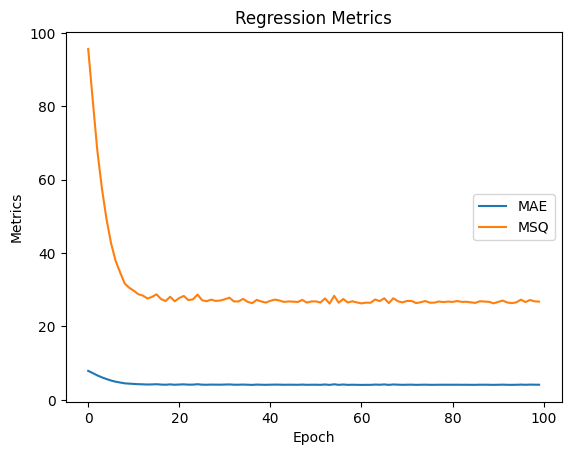

In [ ]:
# Plot training & validation Mean Absolute Error values
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['mean_squared_error'])
plt.title('Regression Metrics')
plt.ylabel('Metrics')
plt.xlabel('Epoch')
plt.legend(['MAE', 'MSQ'], loc='right')
plt.show()

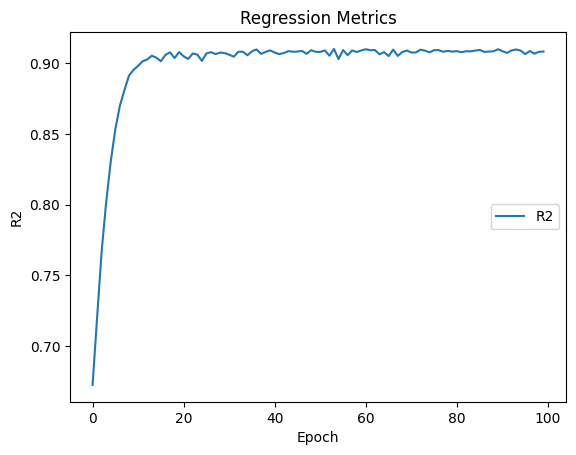

In [ ]:
# Plot training & validation Mean Absolute Error values
plt.plot(history.history['r2_score'])
plt.title('Regression Metrics')
plt.ylabel('R2')
plt.xlabel('Epoch')
plt.legend(['R2'], loc='right')
plt.show()

In [ ]:
print(dataset.columns)

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')


Text(0, 0.5, 'Dep Var')

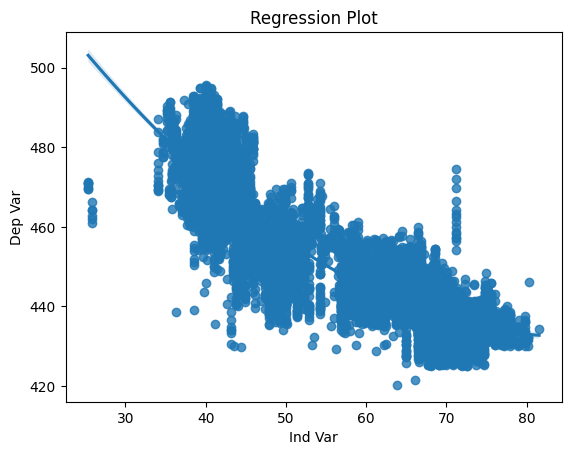

In [ ]:
# residual plot
# Plot 1: Standard regression plot

ax = sns.regplot(data=dataset, x=dataset['V'], y=dataset['PE'], order=2)
ax.set_title('Regression Plot')
ax.set_xlabel('Ind Var')
ax.set_ylabel('Dep Var')